# Test image processing

This notebook tests the image processing to make sure that it works for all images in the landscape1 dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random

sys.path.append('..')
from utils import *

In [2]:
random.seed(42)

## Test single image

This portion tests a single image and makes sure that it works for a single image before moving on to larger datasets

In [3]:
image_path = r"../dataset/landscape1/Training Data/Desert\Desert-Train (1057).jpeg"

In [4]:
x_values, y_values = psword_utils.process_image(image_path, 50, 150)
print(f"There are {len(x_values)} points")

There are 67 points


In [5]:
weighted_angles, roundness = psword_utils.calculate_weighted_angles_by_edge_length(
    x_values,
    y_values
)
print(f"Weighted Average Angle: {weighted_angles:.2f} degrees")
print(f"Roundness: {roundness:.2f}")

Weighted Average Angle: 115.53 degrees
Roundness: 0.64


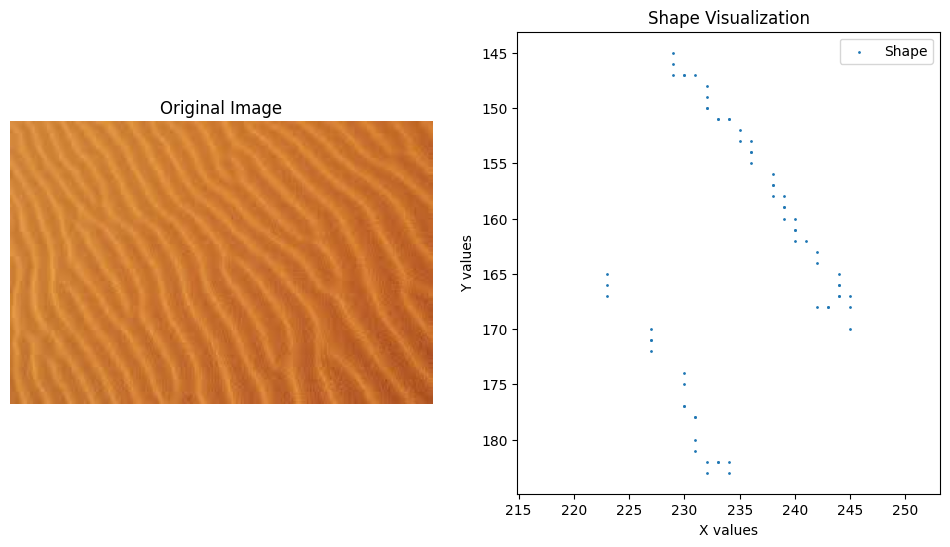

In [6]:
# Display the original image
original_image = plt.imread(image_path)
plt.figure(figsize=(12, 6))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Plot the shape visualization with dots only
plt.subplot(1, 2, 2)
plt.scatter(x_values, y_values, label='Shape', s=1)
plt.title('Shape Visualization')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.gca().invert_yaxis()
plt.axis('equal')

plt.show()

In [7]:
filename = '../utils/sound_mappings.json'
psword = psword_gen.pseudoword_generator(
    roundness,
    len(x_values),
    filename
)
calc_roundness, error = psword_gen.evaluate_pseudoword(
    psword,
    roundness,
    filename
)

print(f"Pseudoword: {psword}")
print(f"Original Roundness: {roundness:.2f}")
print(f"Roundness: {calc_roundness:.2f}")
print(f"Error: {error:.2f}")

Pseudoword: yege
Original Roundness: 0.64
Roundness: 0.71
Error: 0.07


## Test Dataframe

This portion tests the processing on the entire landscape1 dataset (12k rows)

In [8]:
images = pd.read_csv(r'..\dataset\landscape1\csvs\image_classification.csv')
images.drop(columns=['split', 'folder', 'top_tags', 'similarity_scores'], inplace=True)
images

,filename,image_path
0,Coast-Test (1).jpeg,../dataset/landscape1/Testing Data/Coast\Coast...
1,Coast-Test (100).jpeg,../dataset/landscape1/Testing Data/Coast\Coast...
2,Coast-Test (101).jpeg,../dataset/landscape1/Testing Data/Coast\Coast...
3,Coast-Test (102).jpeg,../dataset/landscape1/Testing Data/Coast\Coast...
4,Coast-Test (103).jpeg,../dataset/landscape1/Testing Data/Coast\Coast...
...,...,...
11995,Mountain-Valid (95).jpeg,../dataset/landscape1/Validation Data/Mountain...
11996,Mountain-Valid (96).jpeg,../dataset/landscape1/Validation Data/Mountain...
11997,Mountain-Valid (97).jpeg,../dataset/landscape1/Validation Data/Mountain...
11998,Mountain-Valid (98).jpeg,../dataset/landscape1/Validation Data/Mountain...


In [9]:
sound_dict = psword_gen.load_sound_mappings('../utils/sound_mappings.json')

def generate_pseudoword_and_bouba_kiki(image_path):
    x_values, y_values = psword_utils.process_image(image_path, 50, 150)
    weighted_angles, roundness = psword_utils.calculate_weighted_angles_by_edge_length(x_values, y_values)
    
    random.seed(42)
    
    psword = psword_gen.pseudoword_generator(
        roundness,
        len(x_values),
        sound_dict=sound_dict
    )
    
    return roundness, psword

images[['roundness', 'pseudoword']] = images.apply(
    lambda row: generate_pseudoword_and_bouba_kiki(row['image_path']),
    axis=1,
    result_type='expand'
)